## Chapter10 作业 代码部分

#### 题目1

In [1]:
import networkx as nx
from torch_geometric.datasets import CitationFull
import scipy.sparse as sp
import numpy as np
# here code will download cora dataset into 'cora' folder under running directory
g = CitationFull(root='cora',name='cora')[0]
row = g.edge_index[0,:]
col = g.edge_index[1,:]
data = np.ones_like(row)
n_node = g.x.shape[0]
sp_edge = sp.coo_matrix((data,(row,col)),shape=(n_node,n_node))
graph = nx.from_scipy_sparse_matrix(sp_edge)
graph

[[-2.208172]] [4.59703837]


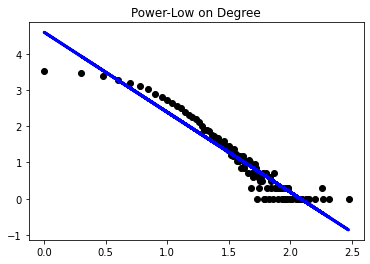

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn import linear_model

deg = defaultdict(int)
for _, d in graph.degree():
    deg[d] += 1
X = np.array(list(deg.keys())).reshape(-1,1)
Y = np.array(list(deg.values())).reshape(-1,1)
assert len(X) == len(Y)
X = np.log10(X)
Y = np.log10(Y)
model = linear_model.LinearRegression()
model.fit(X=X,y=Y)
alpha = model.coef_
C = model.intercept_
loss = np.mean((alpha*X+C-Y)**2)
print(alpha, C)
# 可视化
plt.title("Power-Low on Degree")
plt.scatter(X, Y,  color='black')
plt.plot(X, model.predict(X), color='blue',linewidth=3)
plt.show()

图中三角形计数可以使用定理：$tr(A^3)/6$

In [3]:
from scipy.optimize import curve_fit
A = nx.to_scipy_sparse_matrix(graph)
tri = (A*A*A).diagonal().sum()/6

def _func(x,a):
    return x**a
a,_ = curve_fit(_func,xdata=[n_node], ydata=[tri])
a

D:\anaconda\envs\torch\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1.09035425])

pagerank算法

In [4]:
pr = nx.pagerank(graph)
pr = sorted(pr.items(), key=lambda x:x[1],reverse=True)
pr[:3]

[(14810, 0.002372127786931512),
 (9554, 0.00150743271989963),
 (10332, 0.0011751625220993833)]

首先根据特征矩阵找到最相似和最不相似的节点对

In [5]:
import torch

# cosine similarity
feat = g.x
feat /= torch.norm(g.x, dim=1).reshape(-1,1)
feat_sim = torch.matmul(feat, feat.T)
# argmin
min_idx = torch.argmin(feat_sim)
min_row_id = int(min_idx/n_node)
min_col_id = min_idx%n_node
# diag set to 0
diag = torch.diagonal(feat_sim)
diag_mat = torch.diag(diag)
feat_sim -= diag_mat
# argmax
max_idx = torch.argmax(feat_sim)
max_row_id = int(max_idx/n_node)
max_col_id = max_idx%n_node

print(f"feature similarity: max pair:{max_col_id}-{max_row_id}, min pair:{min_col_id}-{min_row_id}")

feature similarity: max pair:967-903, min pair:21-0


In [ ]:
sim1 = nx.simrank_similarity(graph,source=967,target=903)
sim2 = nx.simrank_similarity(graph,source=21,target=0)
sim1, sim2

In [ ]:
x = torch.tensor([[1.,2,3,5],[7,4,100,6],[20,7,8,9]])
norm = torch.norm(x,dim=1).reshape(-1,1)
x /= norm
x

In [ ]:
4%3